In [1]:
#Imports
import os

import numpy as np
import pandas as pd
# wrangle_w as wr

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d

from scipy import stats
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

#### Acquire

In [2]:
red = pd.read_csv('https://query.data.world/s/azffrkwaoqlfrd3srbnuwjp24hvlj4?dws=00000')

In [3]:
white = df = pd.read_csv('https://query.data.world/s/6ao5pdvepveo2qeeafwdfia6bl5mou?dws=00000')

In [4]:
red['type'] = 'red'
white['type'] = 'white'

In [5]:
#Combine dataframes into one 

wine = df= pd.concat([red, white])

In [6]:
wine.to_csv('wine.csv', index = False)

In [7]:
def acquire_wine(df):
    """ This function will access and concat the red wine and white wine csvs acquired from the data.world dataframes
    for preparation"""
    if os.path.isfile('wine.csv'):
        return pd.read_csv('wine.csv')
    else: 
        # Calling in my dfs from csv link
        red = pd.read_csv('https://query.data.world/s/azffrkwaoqlfrd3srbnuwjp24hvlj4?dws=00000')
        white = df = pd.read_csv('https://query.data.world/s/6ao5pdvepveo2qeeafwdfia6bl5mou?dws=00000')
        
        # Adding 'type' categories on both dataframes before concating
        red['type'] = 'red'
        white['type'] = 'white'
        
        # The two become one
        df = wine = pd.concat([red, white], index=False)
        return df

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

#### Prepare

In [10]:
dummies = pd.get_dummies(data=df[['type']], dummy_na= False, drop_first=False)
df = pd.concat([df, dummies], axis = 1)

In [11]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_red,type_white
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1,0


In [12]:
# df = df.drop(columns= 'type')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  type_red              6497 non-null   uint8  
 14  type_white            6497 non-null   uint8  
dtypes: float64(11), int64

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [15]:
df['quality'] =df['quality'].astype('float')

In [16]:
df['quality'].value_counts()

6.0    2836
5.0    2138
7.0    1079
4.0     216
8.0     193
3.0      30
9.0       5
Name: quality, dtype: int64

In [17]:
#Getting range of my quality values
df['quality'].min(), df['quality'].max()

(3.0, 9.0)

In [18]:
#Creating variable to categorize quality
df['quality_bins'] = pd.cut(df.quality,[0,5,7,9], labels=['low_quality', 'mid_quality', 'high_quality'])

In [19]:
df['quality_bins'].value_counts()

mid_quality     3915
low_quality     2384
high_quality     198
Name: quality_bins, dtype: int64

In [20]:
#Check for missing values in df
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
type_red                0
type_white              0
quality_bins            0
dtype: int64

In [21]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_red,type_white,quality_bins
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1,0,low_quality
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,1,0,low_quality


In [22]:
def prep_wine(df):
    """ This function will concat the red wine and white wine csvs acquired from the data.world dataframes
    and prepare them for exploration and analysis"""
    # Creating variable to categorize quality
    df['quality_bins'] = pd.cut(df.quality,[0,5,7,9], labels=['low_quality', 'mid_quality', 'high_quality'])
    # Creating dummy variables for type
    dummies = pd.get_dummies(data=df[['type']], dummy_na= False, drop_first=False)
    df = pd.concat([df, dummies], axis = 1)
    return df

In [23]:
prep_wine(acquire_wine(df))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_bins,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low_quality,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low_quality,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low_quality,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,mid_quality,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low_quality,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,mid_quality,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low_quality,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,mid_quality,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,mid_quality,0,1


Notes:
   - Keeping any outliers in this df because they could be useful in detecting anomalies within our wine scoring process
    
   - All dtypes are floats except for quality, so I'll convert that to a float as well
   - Added new column that accounts for wine type, then generated dummies for both
   - Added new column that categorizes quality into 3 tiers: low, mid, and high qualities

#### Split

In [24]:
def split_wine(df, target):
    '''
    take in a DataFrame return train, validate, test split on wine DataFrame.
    '''
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, val = train_test_split(train, test_size=.30, random_state=123, stratify=train[target])
    return train, val, test

In [25]:
train, val, test = split_wine(df, 'quality')

In [26]:
train.shape, val.shape, test.shape

((3637, 16), (1560, 16), (1300, 16))

#### Scale

In [27]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,7.206736,0.338880,0.317979,5.420126,0.055235,30.456833,116.221611,0.994644,3.219205,0.530129,10.504291,5.818532,0.238658,0.761342
std,1.309803,0.164699,0.142207,4.676374,0.033756,17.846840,56.515891,0.002980,0.160200,0.152035,1.207888,0.873808,0.426322,0.426322
min,3.800000,0.080000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987130,2.740000,0.230000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.000000,0.992240,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,6.900000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.400000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.000000,0.063000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.000000,31.600000,0.611000,289.000000,440.000000,1.010300,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [28]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'type_red',
       'type_white', 'quality_bins'],
      dtype='object')

In [29]:
to_scale= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [30]:
# Making copies to scale
train_sc = train.copy()
val_sc = val.copy()
test_sc =test.copy()

# Make the scaler
minmax= MinMaxScaler()

# Fit the scaler
minmax.fit(train[to_scale])

MinMaxScaler()

In [31]:
#Make dataframes applying my minmax scaler & setting index
train_sc = pd.DataFrame(minmax.transform(train[to_scale]), columns = train[to_scale].columns.values).set_index([train.index.values])
val_sc = pd.DataFrame(minmax.transform(val[to_scale]), columns = val[to_scale].columns.values).set_index([val.index.values])
test_sc = pd.DataFrame(minmax.transform(test[to_scale]), columns = test[to_scale].columns.values).set_index([test.index.values])

In [32]:
type(train[to_scale])

pandas.core.frame.DataFrame

In [33]:
train[to_scale].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
500,7.2,0.280,0.54,16.7,0.045,54.0,200.0,0.99900,3.08,0.49,9.5
2342,7.7,0.400,0.27,4.5,0.034,27.0,95.0,0.99175,3.21,0.59,12.3
2241,7.1,0.280,0.19,7.8,0.040,48.0,184.0,0.99579,3.16,0.50,9.4
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7
942,5.4,0.415,0.19,1.6,0.039,27.0,88.0,0.99265,3.54,0.41,10.0


In [34]:
not_to_scale = ['quality', 'type_red',
       'type_white']

In [35]:
type(train[not_to_scale])

pandas.core.frame.DataFrame

In [36]:
train[to_scale].index

Int64Index([ 500, 2342, 2241,   24,  942, 2180,  371, 2025,  289,  428,
            ...
              78, 2338, 2176, 1175, 1972, 1488,  750, 4870, 1982,  490],
           dtype='int64', length=3637)

In [37]:
type(train[not_to_scale])

pandas.core.frame.DataFrame

In [38]:

# Concating my scaled sets with my non_scaled
train_sc = pd.concat([train_sc, train[not_to_scale]], axis=1)
val_sc = pd.concat([val_sc, val[not_to_scale]], axis=1)
test_sc = pd.concat([test_sc, test[not_to_scale]], axis=1)

# (Notes to self:
# Make sure to put dataframes into brackets before tryng to concat!!!
# And indicate that you want it on one axis!!!!)

In [39]:
train_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
500,0.280992,0.133333,0.54,0.517799,0.059801,0.184028,0.447005,0.512300,0.267717,0.146893,0.217391,6.0,0,1
2342,0.322314,0.213333,0.27,0.122977,0.041528,0.090278,0.205069,0.199396,0.370079,0.203390,0.623188,8.0,0,1


In [40]:
val_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
8,0.330579,0.333333,0.02,0.042071,0.106312,0.027778,0.027650,0.41735,0.488189,0.19209,0.217391,7.0,1,0
1014,0.347107,0.333333,0.16,0.042071,0.184385,0.006944,0.002304,0.31981,0.377953,0.19774,0.463768,6.0,1,0


In [41]:
test_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
4422,0.198347,0.093333,0.28,0.048544,0.051495,0.079861,0.274194,0.197238,0.354331,0.141243,0.362319,6.0,0,1
2236,0.272727,0.133333,0.19,0.229773,0.051495,0.163194,0.410138,0.373759,0.330709,0.152542,0.202899,5.0,0,1


In [42]:
def split_scaled(train, val, test):
    """ This function returns scaled versions of certain features in train/val/test using a MinMax scaler """
    # Features I want to scale
    to_scale= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    # Features I want to keep unscaled
    not_to_scale = ['quality', 'type_red',
       'type_white']
    
    # Making copies to scale
    train_sc = train.copy()
    val_sc = val.copy()
    test_sc =test.copy()

    # Make the scaler
    minmax= MinMaxScaler()

    # Fit the scaler
    minmax.fit(train[to_scale])
    
    # Make dataframes applying my minmax scaler & setting index
    train_sc = pd.DataFrame(minmax.transform(train[to_scale]), columns = train[to_scale].columns.values).set_index([train.index.values])
    val_sc = pd.DataFrame(minmax.transform(val[to_scale]), columns = val[to_scale].columns.values).set_index([val.index.values])
    test_sc = pd.DataFrame(minmax.transform(test[to_scale]), columns = test[to_scale].columns.values).set_index([test.index.values])
    
    # Concating my scaled sets with my non_scaled
    train_sc = pd.concat([train_sc, train[not_to_scale]], axis=1)
    val_sc = pd.concat([val_sc, val[not_to_scale]], axis=1)
    test_sc = pd.concat([test_sc, test[not_to_scale]], axis=1)

    # (Notes to self:
    # Make sure to put dataframes into brackets before tryng to concat!!!
    # And indicate that you want it on one axis!!!!)
    
    return train_sc, val_sc, test_sc

In [43]:
# Testing my function
train_sc, val_sc, test_sc = split_scaled(train, val, test)

In [44]:
# Huzzah!
train_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
500,0.280992,0.133333,0.54,0.517799,0.059801,0.184028,0.447005,0.512300,0.267717,0.146893,0.217391,6.0,0,1
2342,0.322314,0.213333,0.27,0.122977,0.041528,0.090278,0.205069,0.199396,0.370079,0.203390,0.623188,8.0,0,1


In [45]:
X_train, X_val, X_test = train_sc.drop(columns= 'quality'), val_sc.drop(columns='quality'), test_sc.drop(columns='quality')
y_train, y_val, y_test = train['quality'], val['quality'], test['quality']

In [46]:
y_train = pd.DataFrame(y_train)
y_val= pd.DataFrame(y_val)
y_test= pd.DataFrame(y_test)

### Exploratory Analysis

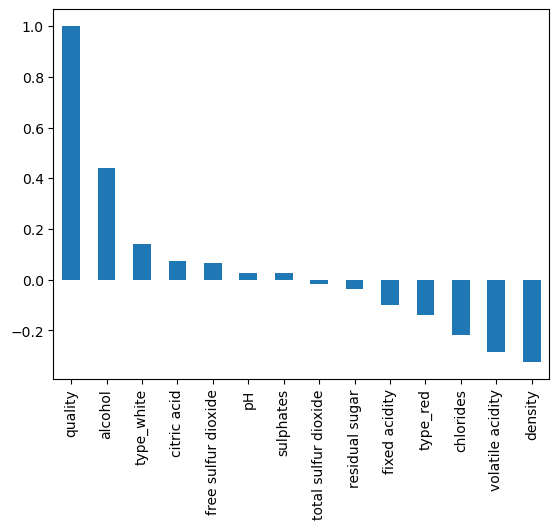

In [47]:
train.corr()['quality'].sort_values(ascending= False).plot(kind = 'bar')
plt.show()

In [48]:
# cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol']
# target = ['quality']
# for col in cols:
#     for col2 in target:
#         fig, (ax1, ax2) =plt.subplots(1,2, figsize=(10,7))
#         sb.boxplot(data= train_sc, x=col, y=col2, ax=ax1)
#         sb.barplot(data= train_sc, x=col, y = col2, ax=ax2)
#         # sb.scatterplot(data= train, x=col, y = col2, ax=ax3)
#         plt.show()

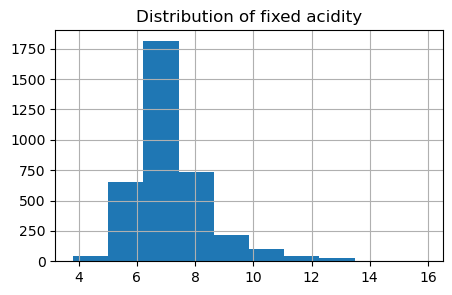

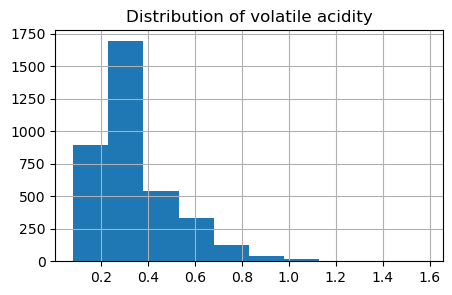

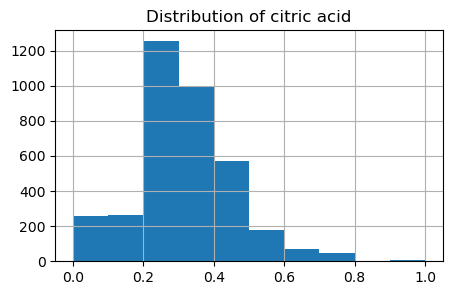

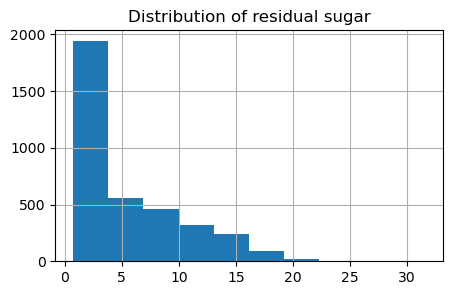

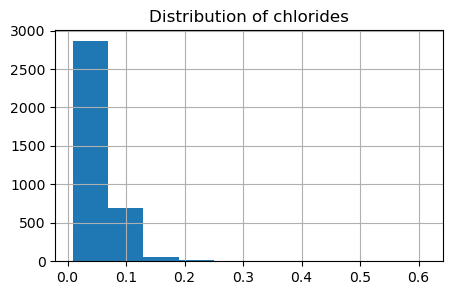

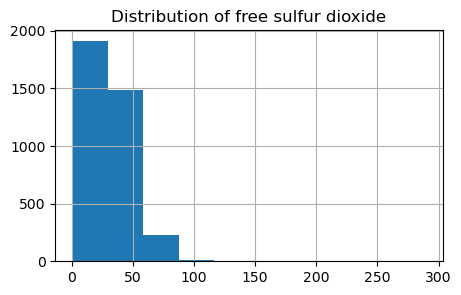

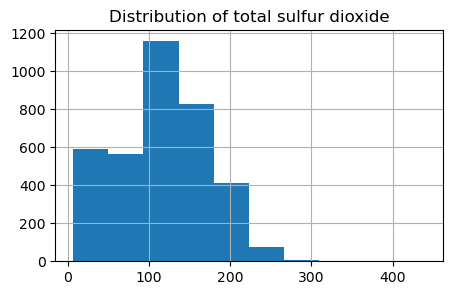

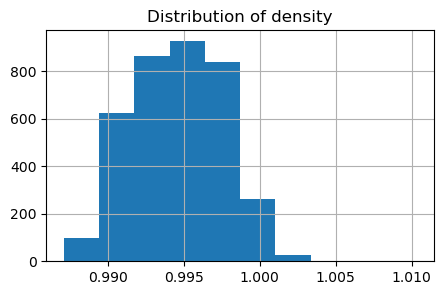

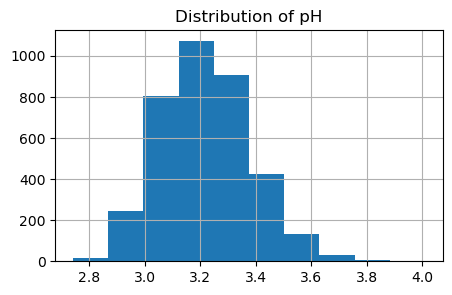

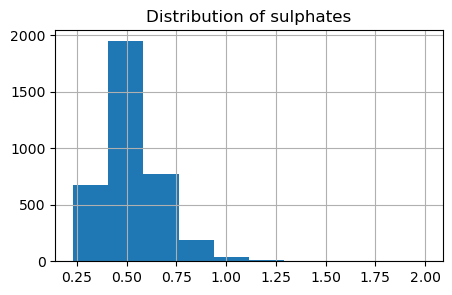

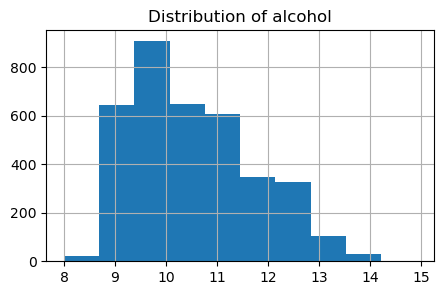

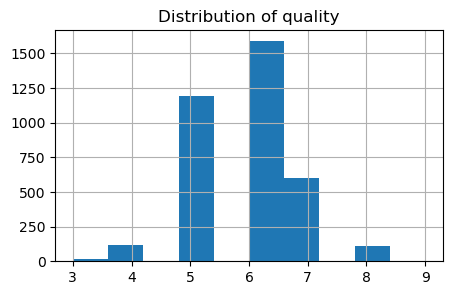

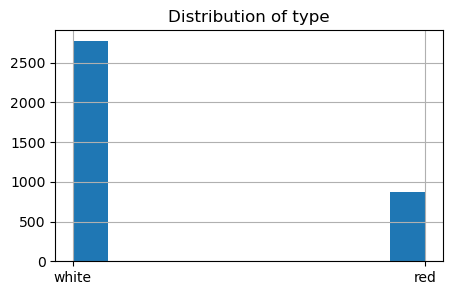

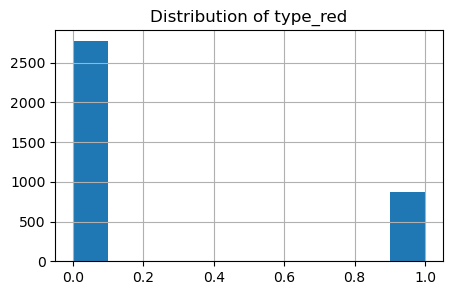

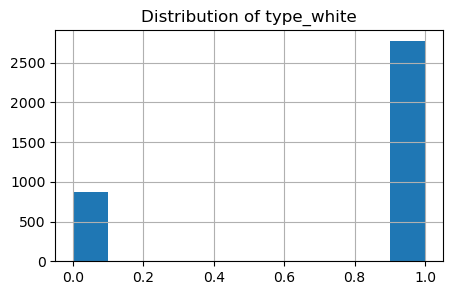

In [49]:
for col in train.columns[:-1]:
    plt.figure(figsize= (5,3))
    train[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

### Statistical Analysis

One thing I'm interested in exploring is how my wine qualities and features might differ between two types of wines. Before I formulate my hypotheses, let's take a look at how our features for each type correlates to quality.

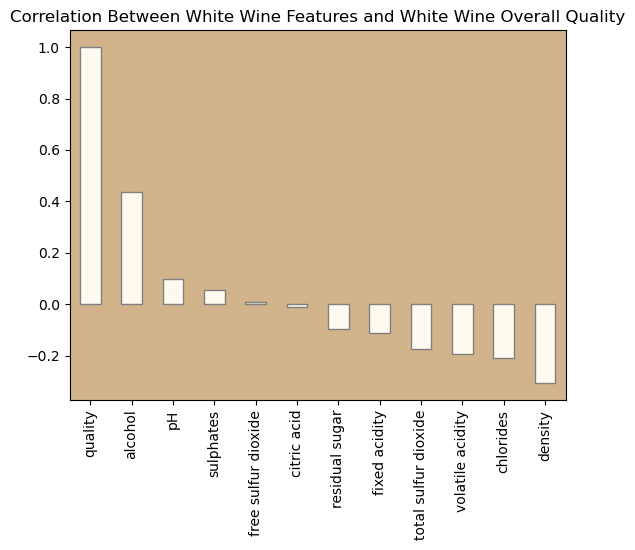

In [50]:
ax = plt.axes()
ax.set_facecolor("tan")
white.corr()['quality'].sort_values(ascending= False).plot(kind = 'bar', color='floralwhite', ec='grey')
plt.title('Correlation Between White Wine Features and White Wine Overall Quality')
plt.show()

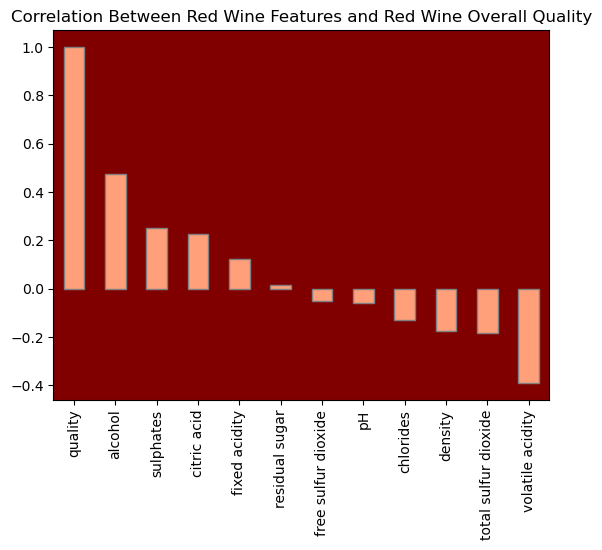

In [51]:
ax = plt.axes()
ax.set_facecolor("maroon")
red.corr()['quality'].sort_values(ascending= False).plot(kind = 'bar', color='lightsalmon', ec='grey')
plt.title('Correlation Between Red Wine Features and Red Wine Overall Quality')
plt.show()

#### Statistical Analysis Questions

1. Does the quality of a wine's score correlate with whether the wine is a red or a white?
2. Are there factors that are more important measurements of quality in white wine than in red?
3. Are higher sulphates more important in determining quality of red wine than in white wine?

#### Question 1: Sulphates in Reds vs. Whites
Are higher sulphates more important in determining quality of red wine than in white wine?

**Null hypothesis:** Higher sulphates are no more important in determining quality of red wine than in white wine

**Hypothesis:** Higher sulphates are more important in determining quality of red wine than in white wine

#### Chart 1 

In [52]:
def sulphates_redwhite(train):
    ax = plt.axes()
    ax.set_facecolor("bisque")
    sb.barplot(data= train, x='quality', y= 'sulphates', hue='type', color = 'firebrick', ec='grey')
    plt.title(' Sulphate Range in Red and White Wine Quality Scores')
    plt.xlabel('Quality Score')
    plt.ylabel('Sulphate Range')
    plt.show()

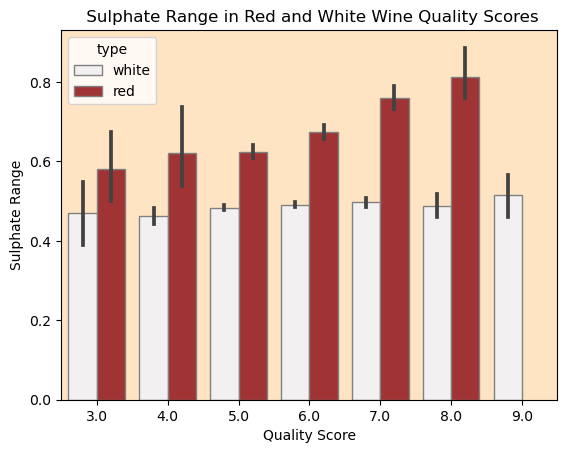

In [53]:
sulphates_redwhite(train)

In [54]:
# I'll use a mann-Whitney's test bc I want to compare the means of two independent samples
a = 0.05
t, p = mannwhitneyu(train.quality, train.sulphates)
if p < a:
    print(f'P-value: {p}')
    print('We reject the null hypothesis')

P-value: 0.0
We reject the null hypothesis


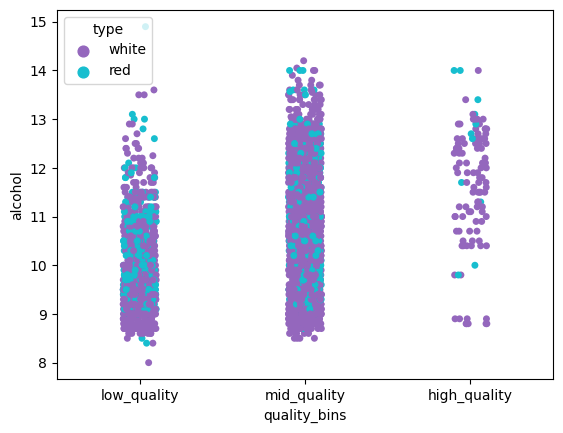

In [55]:
sb.stripplot(data = train, x='quality_bins', y='alcohol', hue='type', palette=["C4", "C9"])
plt.show()

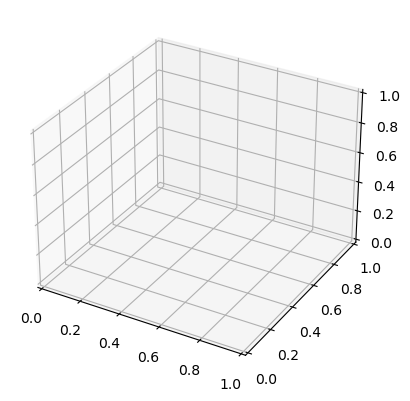

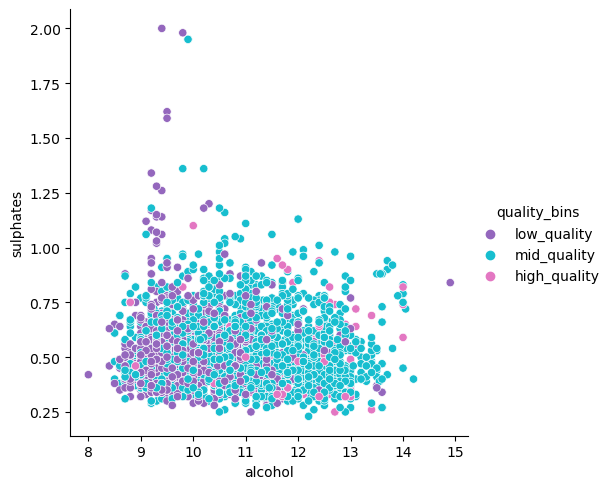

In [56]:
plt.figure()
plt.axes(projection='3d')
sb.relplot(data=train, x='alcohol', y='sulphates', hue='quality_bins', palette=["C4", "C9", "C6"])
plt.show()

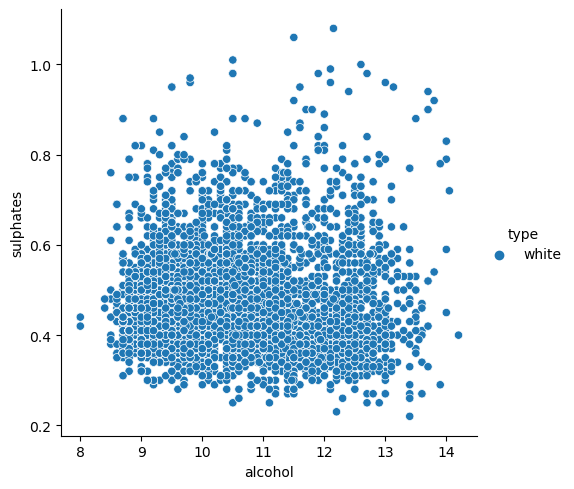

In [57]:
sb.relplot(data=white, x='alcohol', y='sulphates', hue='type')
plt.show()

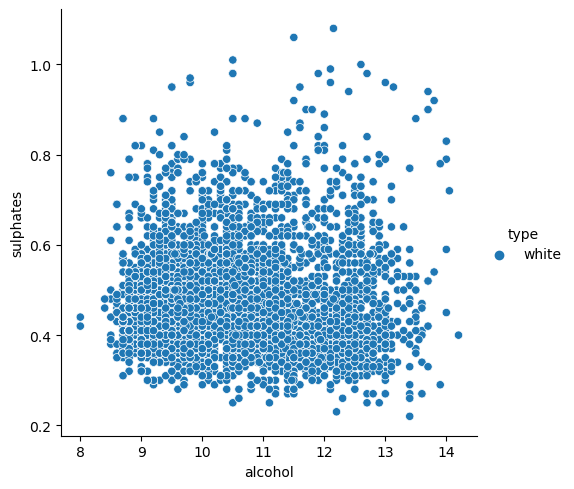

In [58]:
sb.relplot(data=white, x='alcohol', y='sulphates', hue='type')
plt.show()

### Clustering

In [59]:
from sklearn.cluster import KMeans
# saving to wrangle.py
def clusters_sc(df, v1, v2):
    # Creating df with my 2 independent variables that I want to cluster. No need to scale since I'm using train_sc
    df = train_sc[[v1, v2]]
    
    # Making the thing
    kmc = KMeans(n_clusters = 3, random_state= 123)
    # Fitting the thing
    kmeans.fit(df)
    # Predicting 
    kmeans.predict(df)
    
    df['cluster_sc'] = kmeans.predict(df)
    
    return df

In [60]:
def change_clusters(df, v1, v2):
    inertia= []
    for n in range (2, 10):
        # Making object
        kmc = KMeans(n_clusters = n, random_state= 123 )
        # Fitting object
        kmc.fit(df[[v1, v2]])
        inertia.append(kmc.inertia_)
    # return inertia
    i_results = pd.DataFrame({'n_clusters': list(range(2, 10)),
                                  'inertia': inertia})

    return i_results

In [61]:
dpH =change_clusters(train_sc, 'alcohol', 'quality')

In [62]:
dpH

,n_clusters,inertia
0,2,1029.088863
1,3,359.449805
2,4,202.920080
3,5,103.908240
4,6,73.398611
5,7,58.489138
6,8,46.206218
7,9,34.607454


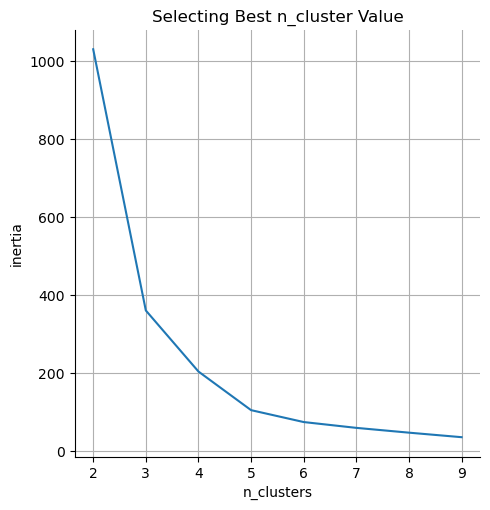

In [63]:
sb.relplot(data= dpH, x = 'n_clusters', y= 'inertia', kind='line')
plt.title('Selecting Best n_cluster Value')
plt.grid()
plt.show()

In [102]:
# Stats test: Alcohol vs Quality
r, p_value = stats.pearsonr(train['alcohol'], train['quality'])
print(f"Correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation coefficient: 0.439
P-value: 0.000


Now I know that the exact correlation between the combined dataset quality and alcohol. 
Next, I want to know if there's a significant difference in low-aclohol and high-alcohol in quality

In [104]:
# T_test for quality of wines with high and low alcohol content
high_alcohol = train[train['alcohol'] >= train['alcohol'].mean()]
low_alcohol = train[train['alcohol'] < train['alcohol'].mean()]

t, p_value = stats.ttest_ind(high_alcohol['quality'], low_alcohol['quality'], equal_var=False)
print(f"T-statistic: {t:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 25.516
P-value: 0.000


In [103]:

# Testing for similar significance as  t-test, but more bins/ ANOVA
bins = [8, 10, 12, 14, 16]
labels = ['Low', 'Medium', 'High', 'Very high']
train['alcohol_group'] = pd.cut(train['alcohol'], bins=bins, labels=labels)

anova = stats.f_oneway(train[train['alcohol_group'] == 'Low']['quality'],
                       train[train['alcohol_group'] == 'Medium']['quality'],
                       train[train['alcohol_group'] == 'High']['quality'],
                       train[train['alcohol_group'] == 'Very high']['quality'])
print(f"F-statistic: {anova.statistic:.3f}")
print(f"P-value: {anova.pvalue:.3f}")



F-statistic: 268.322
P-value: 0.000


In [105]:
# make it all a function for wrangle.py

def stats_q2(train):
    """ This function returns my statistical testing data for quality vs alcohol evaluation"""
    # Correlation for quality and alcohol
    r, p_value = stats.pearsonr(train['alcohol'], train['quality'])
    print(f"Correlation coefficient: {r:.3f}")
    print(f"P-value: {p_value:.3f}")

    # T_test for quality of wines with high and low alcohol content

    high_alcohol = train[train['alcohol'] >= train['alcohol'].mean()]
    low_alcohol = train[train['alcohol'] < train['alcohol'].mean()]

    t, p_value = stats.ttest_ind(high_alcohol['quality'], low_alcohol['quality'], equal_var=False)
    print(f"T-statistic: {t:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Testing for similar significance as  t-test, but more bins/ ANOVA

    bins = [8, 10, 12, 14, 16]
    labels = ['Low', 'Medium', 'High', 'Very high']
    train['alcohol_group'] = pd.cut(train['alcohol'], bins=bins, labels=labels)

    anova = stats.f_oneway(train[train['alcohol_group'] == 'Low']['quality'],
                           train[train['alcohol_group'] == 'Medium']['quality'],
                           train[train['alcohol_group'] == 'High']['quality'],
                           train[train['alcohol_group'] == 'Very high']['quality'])
    print(f"F-statistic: {anova.statistic:.3f}")
    print(f"P-value: {anova.pvalue:.3f}")

In [106]:
stats_q2(train)

Correlation coefficient: 0.439
P-value: 0.000
T-statistic: 25.516
P-value: 0.000
F-statistic: 268.322
P-value: 0.000


In [107]:
# Adriana is doing the clustering and 1 more evaluation, so I can move on th modeling

### MODELING

In [66]:
# Baseline for Classification
baseline_pred = y_train.mode()
baseline_acc = round((y_train ==6.0).mean(),2)

print(f'Baseline Prediction: {baseline_pred}')
print(f'Baseline Accuracy: {baseline_acc}')

Baseline Prediction:    quality
0      6.0
Baseline Accuracy: quality    0.44
dtype: float64


In [67]:
# Comfirming my baseline accuracy
y_train.value_counts()

quality
6.0        1588
5.0        1196
7.0         604
4.0         121
8.0         108
3.0          17
9.0           3
dtype: int64

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
def dt__comp_train_test(X_train, y_train): 
    christmas=[]
    for i in range(1,15):
        # make the thing
        tree=DecisionTreeClassifier(max_depth= i, random_state= 123)
        # fit the thing 
        tree.fit(X_train, y_train)
        # use the thing to evaluate model performance
        out_of_sample= tree.score(X_val, y_val)
        in_sample=tree.score(X_train, y_train)
        difference= round((in_sample - out_of_sample) * 100,2)

        #labeling columns for table
        heads= {'max_depth': {i}, 
                'train_accuracy' : in_sample,
                'val_accuracy' : out_of_sample,
                'Percentage Difference' : difference}
        christmas.append(heads)
    willow = pd.DataFrame(christmas)
    return willow

In [69]:
dtscores = dt__comp_train_test(X_train, y_train)

In [70]:
dtscores

,max_depth,train_accuracy,val_accuracy,Percentage Difference
0,{1},0.513335,0.492949,2.04
1,{2},0.537531,0.523718,1.38
2,{3},0.551828,0.526923,2.49
3,{4},0.560352,0.531410,2.89
4,{5},0.578774,0.537179,4.16
5,{6},0.605994,0.539103,6.69
6,{7},0.634039,0.530128,10.39
7,{8},0.664559,0.528205,13.64
8,{9},0.707176,0.533974,17.32
9,{10},0.759692,0.544872,21.48


In [71]:
def dtmodel(X_train, y_train):   
    tree=DecisionTreeClassifier(max_depth= 6, random_state= 123)
    # fit the thing 
    tree.fit(X_train, y_train)
    # use the thing to evaluate model performance
    out_of_sample= tree.score(X_val, y_val)
    in_sample=tree.score(X_train, y_train)
    difference= round((in_sample - out_of_sample) * 100,2)
    
    labels = pd.DataFrame(data=[{'model': 'DecisionTree',
                   'Train Accuracy': in_sample,
                   'Validate Accuracy': out_of_sample,
                   'Percentage Difference': difference
                   }])
    return labels

In [72]:
tree=DecisionTreeClassifier(max_depth= 6, random_state= 123)
    # fit the thing 
tree.fit(X_train, y_train)
# use the thing to evaluate model performance
dtpred = tree.predict(X_val)

classification_report(y_val, dtpred)

'              precision    recall  f1-score   support\n\n         3.0       0.00      0.00      0.00         7\n         4.0       0.00      0.00      0.00        52\n         5.0       0.59      0.60      0.59       514\n         6.0       0.52      0.72      0.60       681\n         7.0       0.47      0.16      0.24       259\n         8.0       0.33      0.02      0.04        46\n         9.0       0.00      0.00      0.00         1\n\n    accuracy                           0.54      1560\n   macro avg       0.27      0.21      0.21      1560\nweighted avg       0.51      0.54      0.50      1560\n'

In [73]:
classification_report(y_val, dtpred)

'              precision    recall  f1-score   support\n\n         3.0       0.00      0.00      0.00         7\n         4.0       0.00      0.00      0.00        52\n         5.0       0.59      0.60      0.59       514\n         6.0       0.52      0.72      0.60       681\n         7.0       0.47      0.16      0.24       259\n         8.0       0.33      0.02      0.04        46\n         9.0       0.00      0.00      0.00         1\n\n    accuracy                           0.54      1560\n   macro avg       0.27      0.21      0.21      1560\nweighted avg       0.51      0.54      0.50      1560\n'

In [74]:
dtmodel = dtmodel(X_train, y_train)

In [75]:
dtmodel

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,DecisionTree,0.605994,0.539103,6.69


In [76]:
def dtmodel2(X_train, y_train):   
    tree=DecisionTreeClassifier(max_depth= 4, random_state= 123)
    # fit the thing 
    tree.fit(X_train, y_train)
    # use the thing to evaluate model performance
    out_of_sample= tree.score(X_val, y_val)
    in_sample=tree.score(X_train, y_train)
    difference= round((in_sample - out_of_sample) * 100,2)
    
    labels = pd.DataFrame(data=[{'model': 'DecisionTree',
                   'Train Accuracy': in_sample,
                   'Validate Accuracy': out_of_sample,
                   'Percentage Difference': difference
                   }])
    return labels

In [77]:
dtmodel2 = dtmodel2(X_train, y_train)

In [78]:
dtmodel2

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,DecisionTree,0.560352,0.53141,2.89


**Notes**

None of these validation accuracy scores aren't fantastic, but they all beat my baseline accuracy of 44%
My best model (model with least variance between train and validate sets) is the decision tree model with a max depth of 6

In [79]:
def rt_multi_val(X_train, y_train, X_val, y_val):
    """This function takes in the train and test datasets and computes their respective
    accuracy scores and the difference between those scores when the max_depth and min_samples
    are changed"""
    little_john=[]
    # set range for max_Depth starting at 1, up to 15, counting by 2
    for i in range(1,15,2):
    # set range forin_samples starting at 3, up to 20, counting by 3
        for x in range(3,20,3):
    # fit a Random Forest classifier
            sherwood = RandomForestClassifier(max_depth= i, min_samples_leaf= x, random_state=123)

            rftestfit = sherwood.fit(X_train, y_train)

    # make predictions on the test set
            rftest_pred = sherwood.predict(X_train)

    # calculate model scores
            val_score = sherwood.score(X_val, y_val)
            train_score= sherwood.score(X_train, y_train)
            difference = round((train_score - val_score) * 100, 2)

            labels = {'max_depth': i,
                           'min_samples_leaf': x,
                           'Train Accuracy': train_score,
                           'Validate Accuracy': val_score,
                           'Percentage Difference': difference
                           }
    # create df that measures train score, test score, and the difference between them
            little_john.append(labels)
    return pd.DataFrame(little_john)


In [80]:
rf_multi = rt_multi_val(X_train, y_train, X_val, y_val)

In [81]:
rf_multi

,max_depth,min_samples_leaf,Train Accuracy,Validate Accuracy,Percentage Difference
0,1,3,0.505362,0.487821,1.75
1,1,6,0.505362,0.487821,1.75
2,1,9,0.505362,0.487821,1.75
3,1,12,0.505362,0.487821,1.75
4,1,15,0.505362,0.487821,1.75
5,1,18,0.505362,0.487821,1.75
6,3,3,0.545779,0.526923,1.89
7,3,6,0.546054,0.526282,1.98
8,3,9,0.546329,0.527564,1.88
9,3,12,0.546054,0.527564,1.85


In [82]:
def rfmodel(X_train, y_train):
# fit a Random Forest classifier
    sherwood = RandomForestClassifier(max_depth= 3, min_samples_leaf= 15, random_state=123)

    rftestfit = sherwood.fit(X_train, y_train)

# make predictions on the test set
    rftest_pred = sherwood.predict(X_train)

# calculate model scores
    val_score = sherwood.score(X_val, y_val)
    train_score= sherwood.score(X_train, y_train)
    difference = round((train_score - val_score) * 100, 2)

    labels = pd.DataFrame(data=[{'model': 'RandomForest',
                   'Train Accuracy': train_score,
                   'Validate Accuracy': val_score,
                   'Percentage Difference': difference
                   }])
    return labels

In [83]:
rfmodel = rfmodel(X_train, y_train)

In [84]:
rfmodel

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,RandomForest,0.546879,0.527564,1.93


**Notes**

My random forest model with the best performance has a max depth of 3 and min_samples_leaf of 15. There is 1.93% variance between my train accuracy of 54.7% and my validation accuracy of 52.8%

In [85]:
def knn_multi_val(X_train, y_train, X_val, y_val):
    """This function takes in the train and test datasets and computes their respective
    accuracy scores and the difference between those scores when the number of neighbors is
    changed"""
    wont_you_be=[]
    # set range for n_neighbors starting at 5, up to 25
    for i in range(5,25):
    # fit a KNN classifier
            nextdoor = KNeighborsClassifier(n_neighbors= i)

            nextdoor.fit(X_train, y_train)

    # make predictions on the test set
            y_pred = nextdoor.predict(X_train)

    # calculate model scores
            val_score = nextdoor.score(X_val, y_val)
            train_score= nextdoor.score(X_train, y_train)
            difference = round((train_score - val_score) * 100, 2)

            labels = {'n_neighbors': i,
                           
                           'Train Accuracy': train_score,
                           'Validate Accuracy': val_score,
                           'Percentage Difference': difference
                           }
    # create df that measures train score, test score, and the difference between them
            wont_you_be.append(labels)
    return pd.DataFrame(wont_you_be)

In [86]:
knn_multi_val(X_train, y_train, X_val, y_val)

,n_neighbors,Train Accuracy,Validate Accuracy,Percentage Difference
0,5,0.691504,0.543590,14.79
1,6,0.667583,0.548718,11.89
2,7,0.667033,0.556410,11.06
3,8,0.650811,0.555128,9.57
4,9,0.640638,0.560256,8.04
5,10,0.629915,0.553846,7.61
6,11,0.621941,0.551282,7.07
7,12,0.621391,0.557051,6.43
8,13,0.613693,0.554487,5.92
9,14,0.608194,0.560897,4.73


In [87]:
def knn_model(X_train, y_train, X_val, y_val):

    # fit a KNN classifier
    nextdoor = KNeighborsClassifier(n_neighbors= 24)

    nextdoor.fit(X_train, y_train)

# make predictions on the test set
    y_pred = nextdoor.predict(X_train)

# calculate model scores
    val_score = nextdoor.score(X_val, y_val)
    train_score= nextdoor.score(X_train, y_train)
    difference = round((train_score - val_score) * 100, 2)

    labels = pd.DataFrame(data=[{'model': 'KNN',
                   'Train Accuracy': train_score,
                   'Validate Accuracy': val_score,
                   'Percentage Difference': difference
                   }])
    return labels

In [88]:
knnmodel = knn_model(X_train, y_train, X_val, y_val)

In [89]:
knnmodel

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,KNN,0.594721,0.552564,4.22


#### Regression Modeling

In [90]:
y_val['quality'].mean()

5.8173076923076925

In [91]:
# Regression Modeling

# Using mode to find my baseline prediction
base_pred= y_train['quality'].mode()

# Adding my baseline means to y_train and y_val
y_train['baseline_mean']= y_train['quality'].mean()
y_val['baseline_mean'] = y_train['quality'].mean()

# RMSE for train and val sets. This will provide my baseline 

base_rmse_train= mean_squared_error(y_train['quality'], y_train['baseline_mean'], squared=False)
base_rmse_mean_val= mean_squared_error(y_val['quality'], y_val['baseline_mean'], squared=False)

In [92]:
difference = round((base_rmse_train-base_rmse_mean_val) * 100, 2)

rmse_base = pd.DataFrame( data=[{'model' : 'Baseline RMSE',
                         'Train Accuracy': base_rmse_train,
                         'Validate Accuracy': base_rmse_mean_val, 
                         'Percentage Difference': difference}])

In [93]:
rmse_base

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,Baseline RMSE,0.873688,0.871535,0.22


Model 4:
    Linear Regression

In [94]:
# Assign variable for linear regression
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# predict
lr_pred = lr.predict(X_train)

lr_df= pd.DataFrame(data=[{'actual': y_train,'predicted_lr': lr_pred}])

lr_rmse = mean_squared_error(y_train, lr_pred)

In [95]:
lr_results = pd.DataFrame(data=[{'model': ' linear regression',
                           'lin_reg_rmse': lr_rmse}])
lr_results

,model,lin_reg_rmse
0,linear regression,0.26508


**Notes** 

My linear regression model performed well under my baseline RMSE, so I'll just stick with classification modeling.

Next, it's time to compare all of my classification models to see which is the best at predicting quality

In [96]:
modelcomp = pd.concat([dtmodel, dtmodel2, rfmodel, knnmodel])

In [97]:
modelcomp

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,DecisionTree,0.605994,0.539103,6.69
0,DecisionTree,0.560352,0.531410,2.89
0,RandomForest,0.546879,0.527564,1.93
0,KNN,0.594721,0.552564,4.22


In [171]:
def boo(X_train, y_train, X_val, y_val):
    
    ## Decision Tree, 6 depth

    dtmodel1=DecisionTreeClassifier(max_depth= 6, random_state= 123)
    # fit the thing 
    dtmfit = dtmodel1.fit(X_train, y_train['quality'])
    # use the thing to evaluate model performance
    dt1out_of_sample= dtmodel1.score(X_val, y_val['quality'])
    dt1in_sample=dtmodel1.score(X_train, y_train['quality'])
    dt1difference= round((dt1in_sample - dt1out_of_sample) * 100,2)

    # Decision Tree, 4 depth

    dtmodel2=DecisionTreeClassifier(max_depth= 4, random_state= 123)
    # fit the thing 
    dtm2fit = dtmodel2.fit(X_train, y_train['quality'])
    # use the thing to evaluate model performance
    dt2out_of_sample= dtmodel2.score(X_val, y_val['quality'])
    dt2in_sample=dtmodel2.score(X_train, y_train['quality'])
    dt2difference= round((dt2in_sample - dt2out_of_sample) * 100,2)


    # fit a Random Forest classifier
    rfmodel = RandomForestClassifier(max_depth= 3, min_samples_leaf= 15, random_state=123)
    # fit a Random Forest classifier
    rftestfit = rfmodel.fit(X_train, y_train['quality'])
    # make predictions on the test set
    rftest_pred = rfmodel.predict(X_train)
    # calculate model scores
    rtval_score = rfmodel.score(X_val, y_val['quality'])
    rttrain_score= rfmodel.score(X_train, y_train['quality'])
    rfdifference = round((rttrain_score - rtval_score) * 100, 2)

    # KNN

    knnmodel = KNeighborsClassifier(n_neighbors= 24)
    # fit a KNN classifier
    knnfit = knnmodel.fit(X_train, y_train['quality'])
    # make predictions on the test set
    y_pred = knnmodel.predict(X_train)
    # calculate model scores
    knnval_score = knnmodel.score(X_val, y_val['quality'])
    knntrain_score= knnmodel.score(X_train, y_train['quality'])
    knndifference = round((knntrain_score - knnval_score) * 100, 2)

    # Model features to concat

    baseline_acc = round((y_train['quality'] ==6.0).mean(),2)
    namelist= ['Baseline Accuracy','Decision Tree(6)', 'Decision Tree(4)', 'Random Forest', 'KNearest']
    train_acc= [baseline_acc, dt1in_sample, dt2in_sample,rttrain_score, knntrain_score]
    val_acc= ['N/A', dt1out_of_sample, dt2out_of_sample,rtval_score, knnval_score]
    difference= ['N/A', dt1difference,dt2difference,rfdifference,knndifference]

    model_comp2 = pd.DataFrame()

    model_comp2['Model']= namelist
    model_comp2['Train Accuracy']= train_acc
    model_comp2['Validation Accuracy']= val_acc
    model_comp2['Difference']= difference

    
    ax = sb.barplot(data=model_comp2, y= 'Model', x= 'Train Accuracy', palette = "deep")
    ax.bar_label(ax.containers[-1], fmt='Model Score:\n%.2f', label_type='center', c='white')
    plt.title('Model Scores for Classification on Train Data')


    # [{'model':namelist, 'Train Accuracy':train_acc,
    #                             'Validate Accuracy': val_acc, 'Percentage Difference': difference}]
    return model_comp2

,Model,Train Accuracy,Validation Accuracy,Difference
0,Baseline Accuracy,0.440000,N/A,N/A
1,Decision Tree(6),0.605994,0.539103,6.69
2,Decision Tree(4),0.560352,0.53141,2.89
3,Random Forest,0.546879,0.527564,1.93
4,KNearest,0.594721,0.552564,4.22


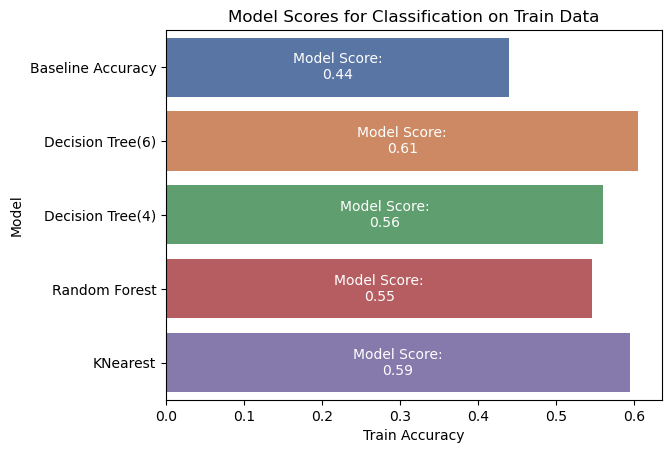

In [172]:
boo(X_train, y_train, X_val, y_val)

Text(0.5, 1.0, 'Model Scores for Classification on Train Data')

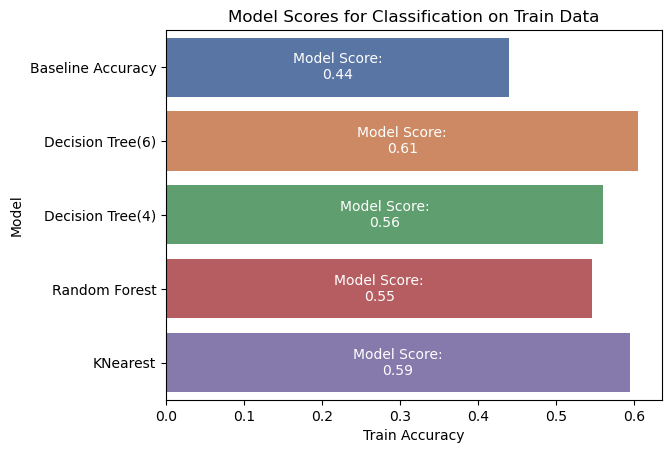

In [160]:
ax = sb.barplot(data=model_comp2, y= 'Model', x= 'Train Accuracy', palette = "deep")
ax.bar_label(ax.containers[-1], fmt='Model Score:\n%.2f', label_type='center', c='white')
plt.title('Model Scores for Classification on Train Data')

# ax = sb.barplot(data=model_comp2, y= 'Model', x= 'Validation Accuracy', palette = "deep")
# ax.bar_label(ax.containers[-1], fmt='Model Score:\n%.2f', label_type='center', c='white')
# plt.title('Model Scores for Classification on Validation Data')

In [162]:
def americasnexttopmodel(X_train, y_train, X_val, y_val):
    """ This function takes all of my top performing models and concats them into 
    one list for comparison to my baseline model"""
    
    #Decision Tree, 6 depth
    
    dtmodel1=DecisionTreeClassifier(max_depth= 6, random_state= 123)
    # fit the thing 
    dtmfit = dtmodel1.fit(X_train, y_train['quality'])
    # use the thing to evaluate model performance
    dt1out_of_sample= dtmodel1.score(X_val, y_val['quality'])
    dt1in_sample=dtmodel1.score(X_train, y_train['quality'])
    dt1difference= round((dt1in_sample - dt1out_of_sample) * 100,2)
    
    # Decision Tree, 4 depth
    
    dtmodel2=DecisionTreeClassifier(max_depth= 4, random_state= 123)
    # fit the thing 
    dtm2fit = dtmodel2.fit(X_train, y_train['quality'])
    # use the thing to evaluate model performance
    dt2out_of_sample= dtmodel2.score(X_val, y_val['quality'])
    dt2in_sample=dtmodel2.score(X_train, y_train['quality'])
    dt2difference= round((dt2in_sample - dt2out_of_sample) * 100,2)
    
    # Random Forest
    
    # fit a Random Forest classifier
    rfmodel = RandomForestClassifier(max_depth= 3, min_samples_leaf= 15, random_state=123)
    # fit a Random Forest classifier
    rftestfit = rfmodel.fit(X_train, y_train['quality'])
    # make predictions on the test set
    rftest_pred = rfmodel.predict(X_train)
    # calculate model scores
    rtval_score = rfmodel.score(X_val, y_val['quality'])
    rttrain_score= rfmodel.score(X_train, y_train['quality'])
    rfdifference = round((rttrain_score - rtval_score) * 100, 2)
    
    # KNN
    
    knnmodel = KNeighborsClassifier(n_neighbors= 24)
    # fit a KNN classifier
    knnfit = knnmodel.fit(X_train, y_train['quality'])
    # make predictions on the test set
    y_pred = knnmodel.predict(X_train)
    # calculate model scores
    knnval_score = knnmodel.score(X_val, y_val['quality'])
    knntrain_score= knnmodel.score(X_train, y_train['quality'])
    knndifference = round((knntrain_score - knnval_score) * 100, 2)
    
    
    # Model features to concat
    namelist= ['Decision Tree(6)', 'Decision Tree(4)', 'Random Forest', 'KNearest']
    train_acc= [dt1in_sample, dt2in_sample,rttrain_score, knntrain_score]
    val_acc= [dt1out_of_sample, dt2out_of_sample,rtval_score, knnval_score]
    difference= [dt1difference,dt2difference,rfdifference,knndifference]
    
    model_comp = pd.DataFrame([{'model':namelist, 'Train Accuracy':train_acc,
                                'Validate Accuracy': val_acc, 'Percentage Difference': difference}])
    
#     model_comp['Model']= namelist
#     model_comp['Train Accuracy']= train_acc
#     model_comp['Validation Accuracy']= val_acc
#     model_comp['Difference']= difference

    ax = sb.barplot(data=model_comp2, y= 'Model', x= 'Train Accuracy', palette = "deep")
    ax.bar_label(ax.containers[-1], fmt='Model Score:\n%.2f', label_type='center', c='white')
    plt.title('Model Scores for Classification on Train Data')


    return modelcomp

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,DecisionTree,0.605994,0.539103,6.69
0,DecisionTree,0.560352,0.531410,2.89
0,RandomForest,0.546879,0.527564,1.93
0,KNN,0.594721,0.552564,4.22


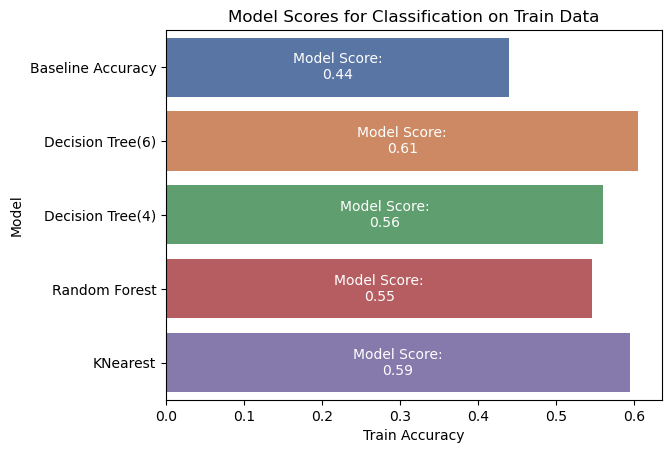

In [163]:
americasnexttopmodel(X_train, y_train, X_val, y_val)